In [1]:
import os

import numpy as np
import pandas as pd
import scipy
from sklearn import preprocessing
import librosa, librosa.display
import matplotlib.pyplot as plt, seaborn as sns

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform


from ftrosa import get_all_musical_features
from ftrosa.visualization import show_audio

# From single data

In [2]:
path_audio = "data/example.wav"
song_name = "example audio"

- Digital signals information - 
 audio time series length: 661500 
 sampling rate: 22050 
 audio length: 30.0 seconds


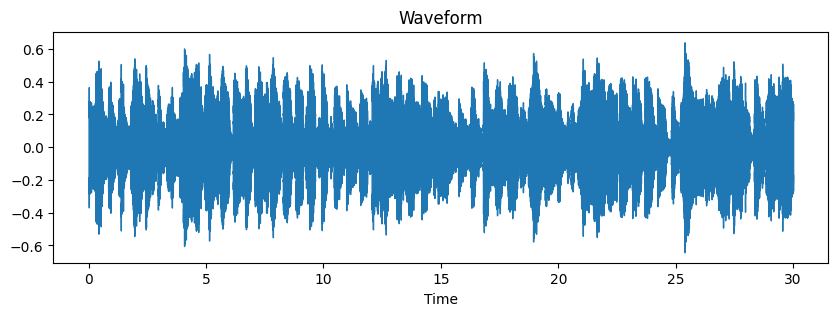

array([-0.05081177, -0.00546265, -0.00180054, ..., -0.01168823,
        0.0369873 ,  0.02142334], dtype=float32)

In [3]:
show_audio(path_audio, duration=30, start=10)

In [4]:
df = get_all_musical_features(
    path_audio,
    song_name,
    stats=None,
    duration=30,
    start=10,
    from_harm_perc=False,
    chroma_harm=True,
    bpm_perc=True,
    sr=22050,
    hpr_margin=1.5,
    chroma_method_list=['cqt'],
    n_contrast_bands=4,
    n_mfcc=12,
    start_bpms=[60, 120])

In [5]:
df

,example audio
spectral_centroid_mean,1979.931217
spectral_centroid_std,656.415575
spectral_centroid_skew,0.792558
spectral_centroid_kurt,1.691311
spectral_centroid_max,5527.106910
...,...
tonnetz_major_y_kurt,-0.486635
tonnetz_major_y_max,0.279931
tonnetz_major_y_min,-0.170317
bpm_s60,56.173573


# From GTZAN data

for short example, i extracted features from 10 songs out of each genre.

In [6]:
path = "data/GTZAN/"

genre_list = []
for genre in os.listdir(path):
    genre_list.append(genre)
    
wav_list = []
for g in genre_list:
    genre_path = path+g+'/'
    for wav in os.listdir(genre_path)[:10]:
        wav_list.append(genre_path+wav)

In [7]:
print(len(wav_list))

100


In [13]:
"""

df_list = []
count = 0

for i in wav_list:
    path_audio = i
    song_name = i.split('/')[-1].split('.wav')[0]

    df_ = get_all_musical_features(
         path_audio,
         song_name,
         start=0,
         chroma_method_list=['cqt'])
    df_list.append(df_)
    count+=1
    if count%5 == 0:
        print(count, 'songs extracted')

df_features = pd.concat(df_list, axis=1).T

labels=[]
for i in df_features.index:
    labels.append(i.split('.')[0])
df_features['genre_label'] = labels

df_features.to_csv('data/example_features.csv')

"""

"\n\ndf_list = []\ncount = 0\n\nfor i in wav_list:\n    path_audio = i\n    song_name = i.split('/')[-1].split('.wav')[0]\n\n    df_ = get_all_musical_features(\n         path_audio,\n         song_name,\n         start=0,\n         chroma_method_list=['cqt'])\n    df_list.append(df_)\n    count+=1\n    if count%5 == 0:\n        print(count, 'songs extracted')\n\ndf_features = pd.concat(df_list, axis=1).T\n\nlabels=[]\nfor i in df_features.index:\n    labels.append(i.split('.')[0])\ndf_features['genre_label'] = labels\n\ndf_features.to_csv('data/example_features.csv')\n\n"

In [14]:
df_features = pd.read_csv('data/example_features.csv', index_col=0)

In [21]:
df_ft_mean = df_features[[col for col in df_features.columns if '_mean' in col]]
df_ft_std = df_features[[col for col in df_features.columns if '_std' in col]]
df_ft_skew = df_features[[col for col in df_features.columns if '_skew' in col]]
df_ft_kurt = df_features[[col for col in df_features.columns if '_kurt' in col]]
df_ft_min = df_features[[col for col in df_features.columns if '_min' in col]]
df_ft_max = df_features[[col for col in df_features.columns if '_max' in col]]

In [30]:
spec_ft_mean = df_ft_mean.iloc[:,:10]
mfcc_ft_mean = df_ft_mean.iloc[:,10:22]
ner_ft_mean = df_ft_mean.iloc[:,22:25]
chro_ft_mean = df_ft_mean.iloc[:,25:]

spec_ft_std = df_ft_std.iloc[:,:10]
mfcc_ft_std = df_ft_std.iloc[:,10:22]
ner_ft_std = df_ft_std.iloc[:,22:25]
chro_ft_std = df_ft_std.iloc[:,25:]

spec_ft_min = df_ft_min.iloc[:,:10]
mfcc_ft_min = df_ft_min.iloc[:,10:22]
ner_ft_min = df_ft_min.iloc[:,22:25]
chro_ft_min = df_ft_min.iloc[:,25:]

spec_ft_max = df_ft_max.iloc[:,:10]
mfcc_ft_max = df_ft_max.iloc[:,10:22]
ner_ft_max = df_ft_max.iloc[:,22:25]
chro_ft_max = df_ft_max.iloc[:,25:]

bpm_ft = df_features.iloc[:,-4:-1]

## Hierarchical Dendrogram

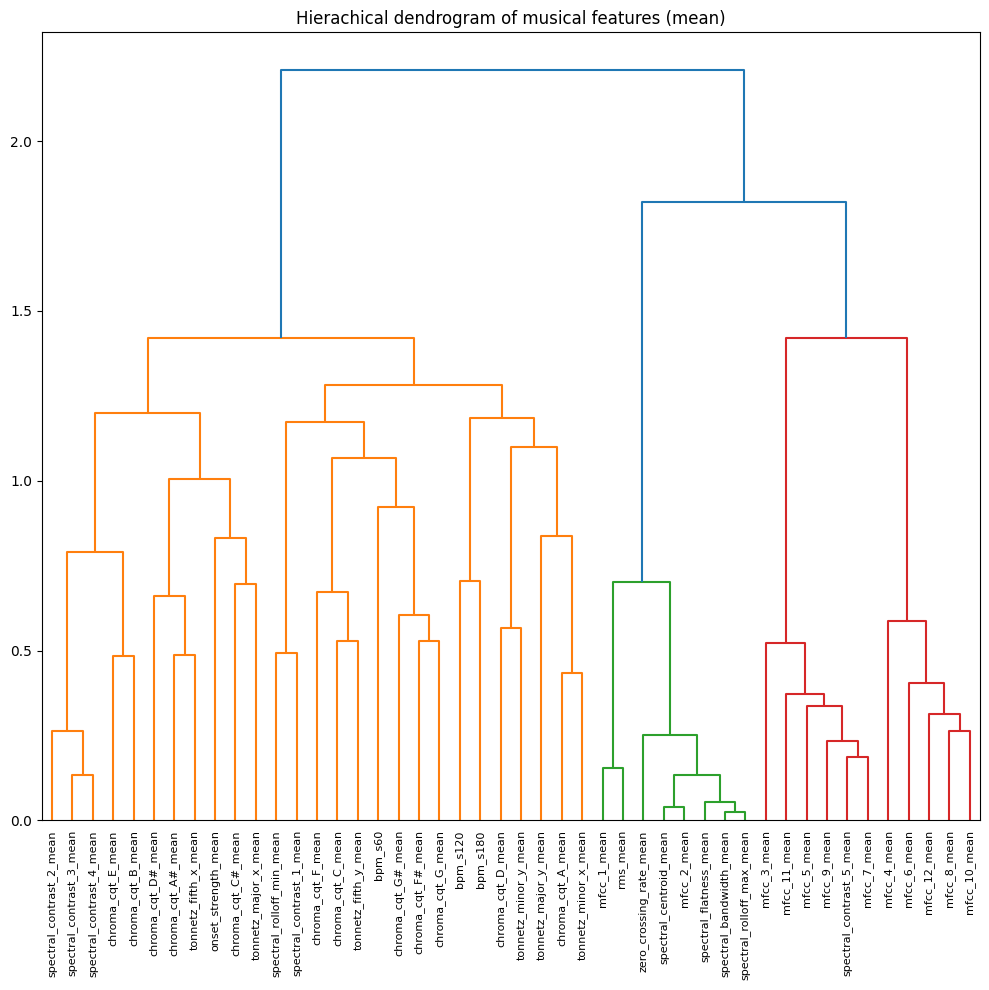

In [26]:
df_ = pd.concat([df_ft_mean, bpm_ft], axis=1)

fig, ax = plt.subplots(1, figsize=(10, 10))
corr = spearmanr(df_).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

plt.title('Hierachical dendrogram of musical features (mean)')
dendro = hierarchy.dendrogram(
    dist_linkage, labels=df_.columns, ax=ax, leaf_rotation=90
)
fig.tight_layout()
plt.show()

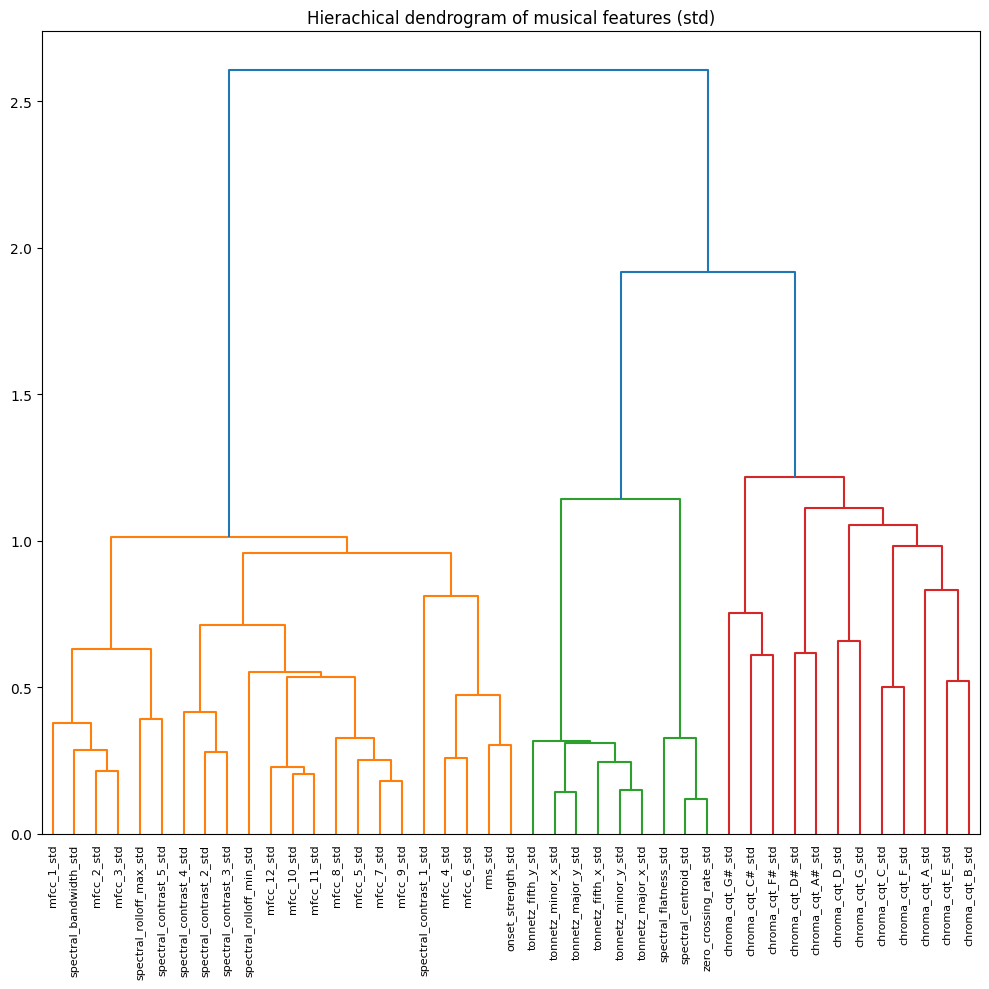

In [27]:
df_ = pd.concat([df_ft_std], axis=1)

fig, ax = plt.subplots(1, figsize=(10, 10))
corr = spearmanr(df_).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T) / 2
np.fill_diagonal(corr, 1)

distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))

plt.title('Hierachical dendrogram of musical features (std)')
dendro = hierarchy.dendrogram(
    dist_linkage, labels=df_.columns, ax=ax, leaf_rotation=90
)
fig.tight_layout()
plt.show()

## Correlation Matrix

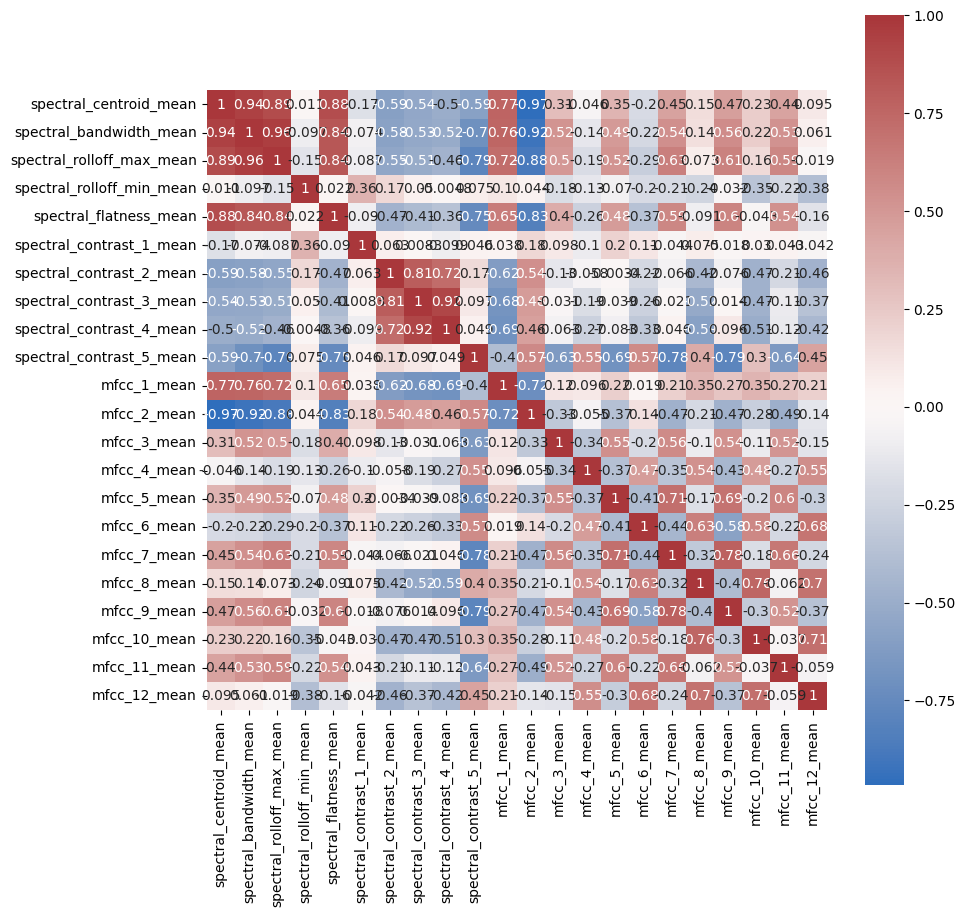

In [33]:
df_ = pd.concat([spec_ft_mean, mfcc_ft_mean], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(df_.corr(), square=True, cmap='vlag', center=0, annot=True)
plt.show()

**Interpretation** (spectral features mean)

- Spectral features such as centroid, bandwith, roll off (99%), flatness have high correlations.
    - When you see the spectrogram(in Visualization Notebook.ipynb), mean of these features are related to dominant(or weighted average of) frequency. 

- Those spectral features mentioned are highly negatively correlated with MFCC 2.
    
- Sprectral contrast sub-bands 2,3,4 have high correlations within each other.

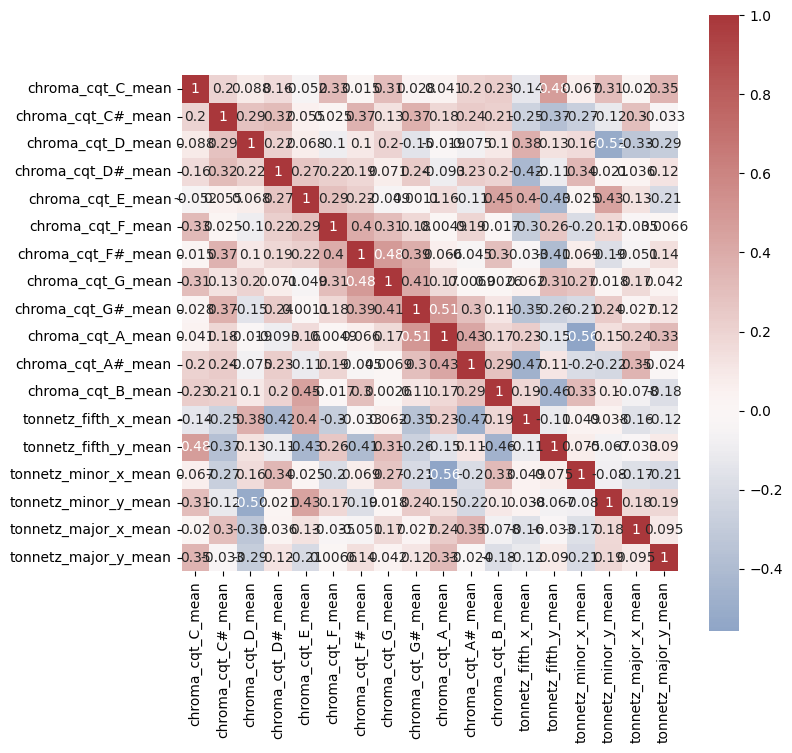

In [34]:
plt.figure(figsize=(8,8))
sns.heatmap(chro_ft_mean.corr(), square=True, cmap='vlag', center=0, annot=True)
plt.show()

- There is few features that are correlated. This is an obvious result for a proper chromagram.

## Boxplots By Genre

### BPMs

Text(0, 0.5, 'BPM')

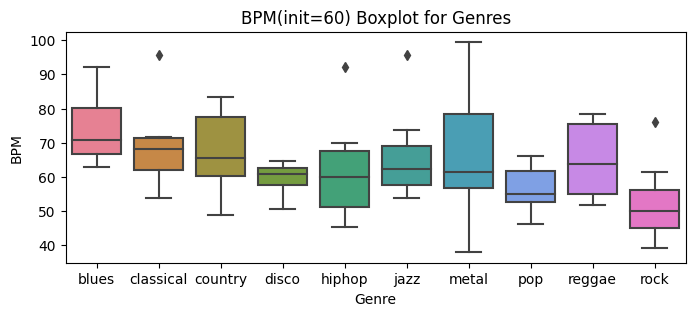

In [93]:
x = df_features[["genre_label", "bpm_s60"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "bpm_s60", data = x, palette = 'husl');

plt.title('BPM(init=60) Boxplot for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("BPM")

Text(0, 0.5, 'BPM')

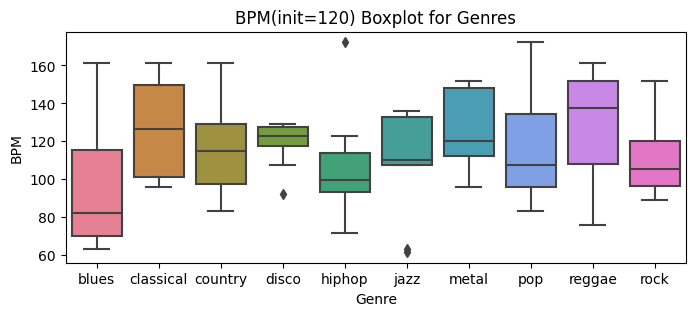

In [95]:
x = df_features[["genre_label", "bpm_s120"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "bpm_s120", data = x, palette = 'husl');

plt.title('BPM(init=120) Boxplot for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("BPM")

Text(0, 0.5, 'BPM')

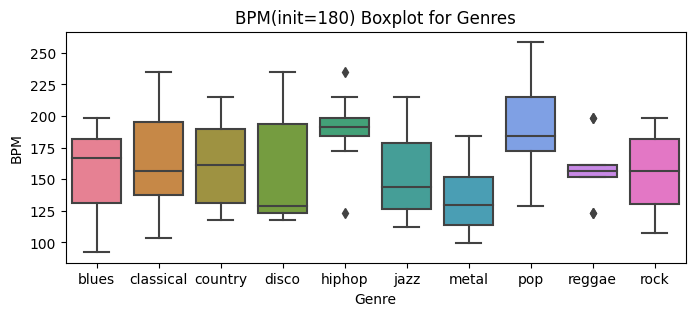

In [96]:
x = df_features[["genre_label", "bpm_s180"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "bpm_s180", data = x, palette = 'husl');

plt.title('BPM(init=180) Boxplot for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("BPM")

Text(0, 0.5, 'Spectral Centroid')

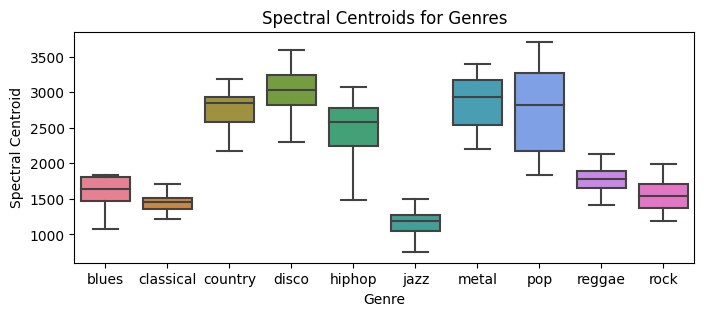

In [41]:
x = df_features[["genre_label", "spectral_centroid_mean"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "spectral_centroid_mean", data = x, palette = 'husl');

plt.title('Spectral Centroids for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Spectral Centroid")

Text(0, 0.5, 'Chroma strength')

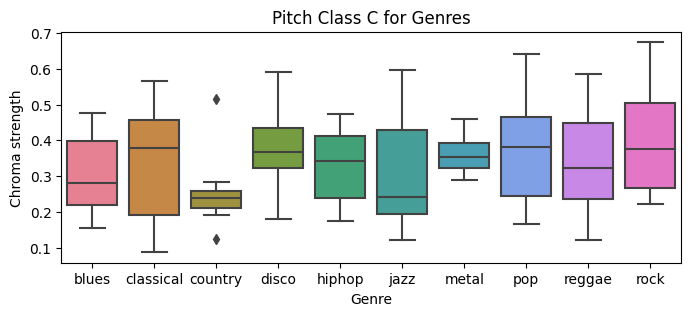

In [54]:
x = df_features[["genre_label", "chroma_cqt_C_mean"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "chroma_cqt_C_mean", data = x, palette = 'husl');

plt.title('Pitch Class C for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Chroma strength")

Text(0, 0.5, 'Chroma strength')

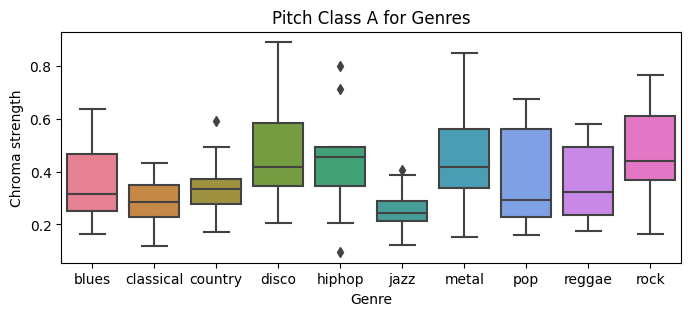

In [58]:
x = df_features[["genre_label", "chroma_cqt_A_mean"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "chroma_cqt_A_mean", data = x, palette = 'husl');

plt.title('Pitch Class A for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Chroma strength")

Text(0, 0.5, 'Spectral Centroid')

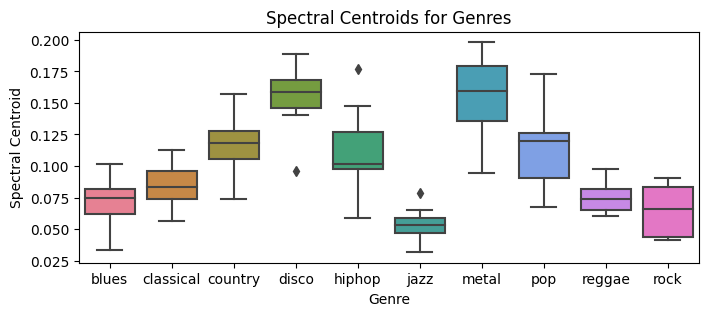

In [49]:
x = df_features[["genre_label", "zero_crossing_rate_mean"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "zero_crossing_rate_mean", data = x, palette = 'husl');

plt.title('Spectral Centroids for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Spectral Centroid")

Text(0, 0.5, 'Spectral Centroid')

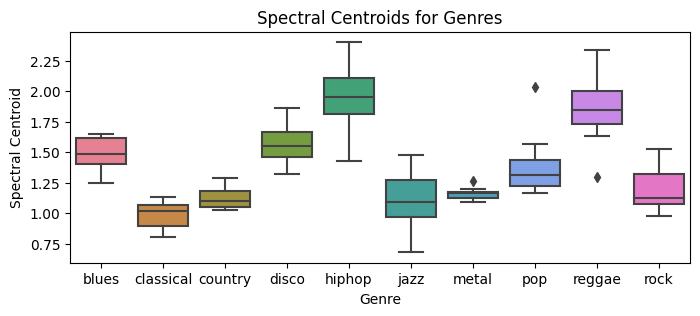

In [50]:
x = df_features[["genre_label", "onset_strength_mean"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "onset_strength_mean", data = x, palette = 'husl');

plt.title('Spectral Centroids for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Spectral Centroid")

Text(0, 0.5, 'Spectral Centroid')

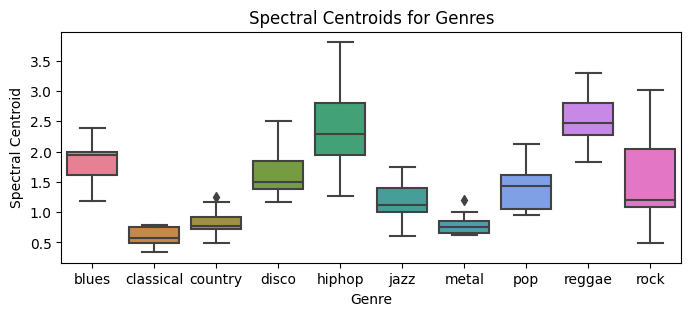

In [51]:
x = df_features[["genre_label", "onset_strength_std"]]

f, ax = plt.subplots(figsize=(8, 3))
sns.boxplot(x = "genre_label", y = "onset_strength_std", data = x, palette = 'husl');

plt.title('Spectral Centroids for Genres')
plt.xticks()
plt.yticks();
plt.xlabel("Genre")
plt.ylabel("Spectral Centroid")